In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

In [2]:
from scipy.sparse import load_npz
X_y=load_npz("class_X_y.npz")

In [3]:
X=X_y[:,:-1]
y=X_y[:,-1]
X=X.toarray()
y=y.toarray()

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)
classifier=DecisionTreeClassifier()

In [7]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.9399765380604796, 0.9933333333333333, 'x[52535] <= 0.5\ngini = 0.271\nsamples = 2405\nvalue = [2016, 389]'),
 Text(0.8966371220020855, 0.98, 'x[22579] <= 0.5\ngini = 0.229\nsamples = 2319\nvalue = [2013, 306]'),
 Text(0.8516684045881127, 0.9666666666666667, 'x[10881] <= 0.5\ngini = 0.204\nsamples = 2270\nvalue = [2009, 261]'),
 Text(0.7867570385818561, 0.9533333333333334, 'x[8540] <= 0.5\ngini = 0.174\nsamples = 2190\nvalue = [1979, 211]'),
 Text(0.7445255474452555, 0.94, 'x[9184] <= 0.5\ngini = 0.156\nsamples = 2158\nvalue = [1974, 184]'),
 Text(0.7101147028154328, 0.9266666666666666, 'x[56418] <= 0.5\ngini = 0.131\nsamples = 2099\nvalue = [1951, 148]'),
 Text(0.6830031282586028, 0.9133333333333333, 'x[18749] <= 2.5\ngini = 0.122\nsamples = 2086\nvalue = [1950, 136]'),
 Text(0.6538060479666319, 0.9, 'x[12814] <= 0.5\ngini = 0.112\nsamples = 2067\nvalue = [1944, 123]'),
 Text(0.6371220020855057, 0.8866666666666667, 'x[22582] <= 0.5\ngini = 0.105\nsamples = 2056\nvalue = [1942, 

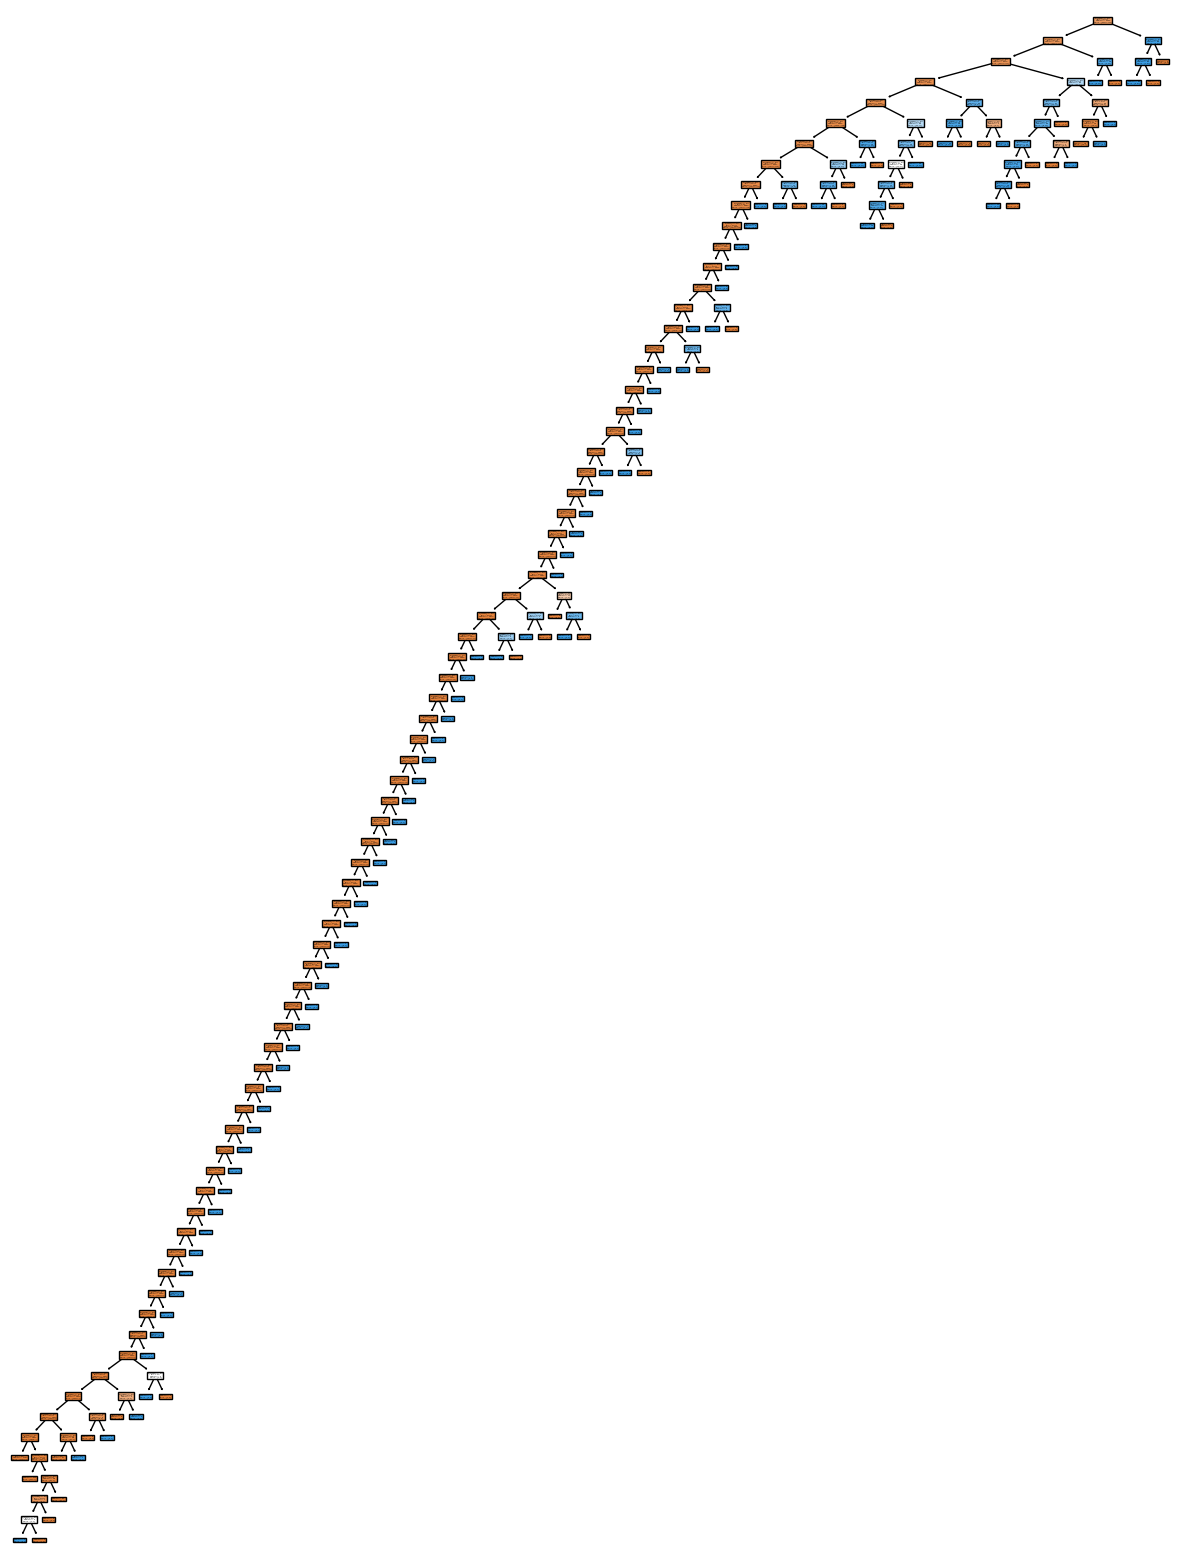

In [8]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(classifier,filled=True)

## Post pruning with max depth =10

In [9]:
classifier=DecisionTreeClassifier(max_depth=10)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

[Text(0.8452620967741935, 0.9545454545454546, 'x[52535] <= 0.5\ngini = 0.271\nsamples = 2405\nvalue = [2016, 389]'),
 Text(0.7335349462365591, 0.8636363636363636, 'x[22579] <= 0.5\ngini = 0.229\nsamples = 2319\nvalue = [2013, 306]'),
 Text(0.6176075268817204, 0.7727272727272727, 'x[10881] <= 0.5\ngini = 0.204\nsamples = 2270\nvalue = [2009, 261]'),
 Text(0.45026881720430106, 0.6818181818181818, 'x[8540] <= 0.5\ngini = 0.174\nsamples = 2190\nvalue = [1979, 211]'),
 Text(0.34139784946236557, 0.5909090909090909, 'x[9184] <= 0.5\ngini = 0.156\nsamples = 2158\nvalue = [1974, 184]'),
 Text(0.25268817204301075, 0.5, 'x[56418] <= 0.5\ngini = 0.131\nsamples = 2099\nvalue = [1951, 148]'),
 Text(0.1827956989247312, 0.4090909090909091, 'x[18749] <= 2.5\ngini = 0.122\nsamples = 2086\nvalue = [1950, 136]'),
 Text(0.10752688172043011, 0.3181818181818182, 'x[12814] <= 0.5\ngini = 0.112\nsamples = 2067\nvalue = [1944, 123]'),
 Text(0.06451612903225806, 0.22727272727272727, 'x[22582] <= 0.5\ngini = 0.10

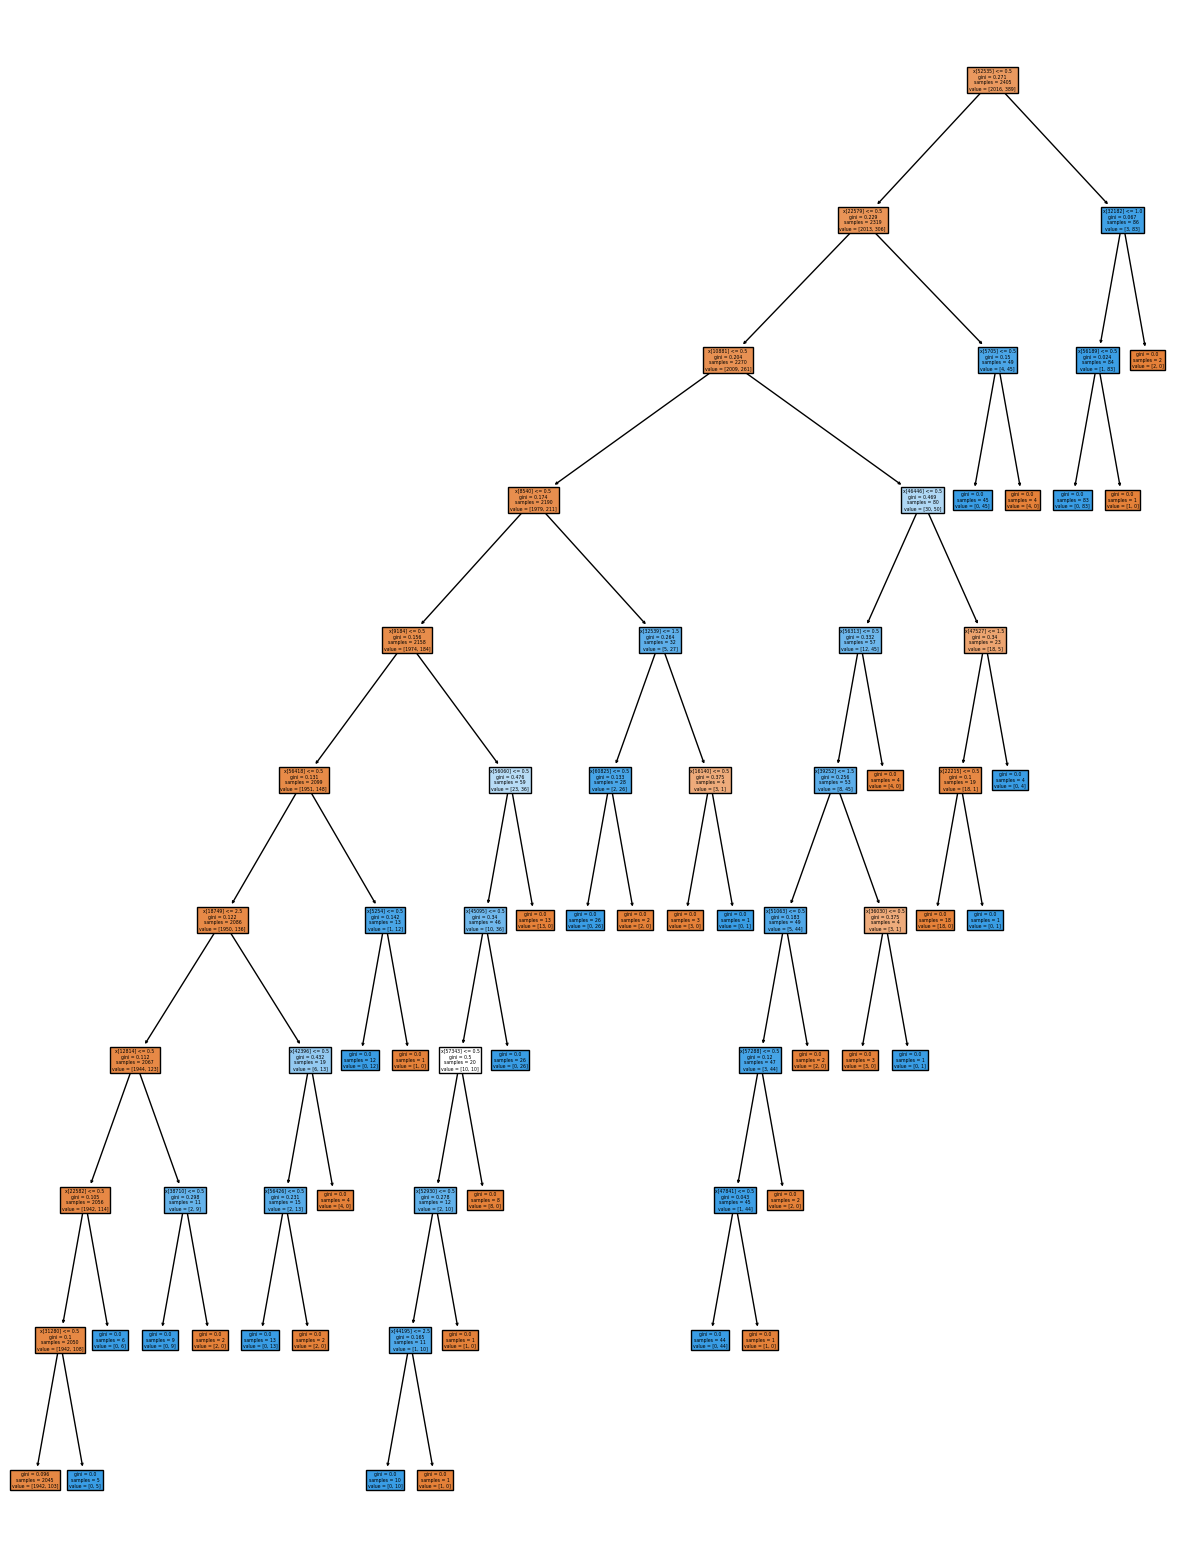

In [10]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(classifier,filled=True)

In [11]:
y_pred=classifier.predict(X_test)

In [12]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,classification_report
score=r2_score(y_pred,y_test)

In [14]:
score

0.2956676793026022

In [15]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9392405063291139
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1072
           1       0.63      0.89      0.74       113

    accuracy                           0.94      1185
   macro avg       0.81      0.92      0.85      1185
weighted avg       0.95      0.94      0.94      1185



## Pre pruning or Hyperparameter tuning

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
parameter={
    

    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}   

In [20]:
from sklearn.model_selection import GridSearchCV

In [23]:
classifier=DecisionTreeClassifier()
clf=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [24]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [25]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [26]:
y_pred=clf.predict(X_test)

In [27]:
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8987341772151899
              precision    recall  f1-score   support

           0       1.00      0.90      0.94      1140
           1       0.27      0.96      0.42        45

    accuracy                           0.90      1185
   macro avg       0.63      0.93      0.68      1185
weighted avg       0.97      0.90      0.92      1185

